## Decision Tree for credit ( target value "default") data set

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('data/credit.csv')
df = df[["age", "amount", "months_loan_duration", "default"]]
df.head()

age  amount  months_loan_duration default
0   67    1169                     6      no
1   22    5951                    48     yes
2   49    2096                    12      no
3   45    7882                    42      no
4   53    4870                    24     yes

In [148]:
#define dinamic column indexes
age = 0
ammount = 1
months_loan_duration = 2
credit_history = 3

#### Explore the Data

In [140]:
print(df.shape)

(1000, 4)


In [141]:
df.default.value_counts()

default
no     700
yes    300
Name: count, dtype: int64

In [142]:
df.describe()

age        amount  months_loan_duration
count  1000.000000   1000.000000           1000.000000
mean     35.546000   3271.258000             20.903000
std      11.375469   2822.736876             12.058814
min      19.000000    250.000000              4.000000
25%      27.000000   1365.500000             12.000000
50%      33.000000   2319.500000             18.000000
75%      42.000000   3972.250000             24.000000
max      75.000000  18424.000000             72.000000

**count says no missing data. features are of different sizes. months_loan_duration the smallest value.**

[]

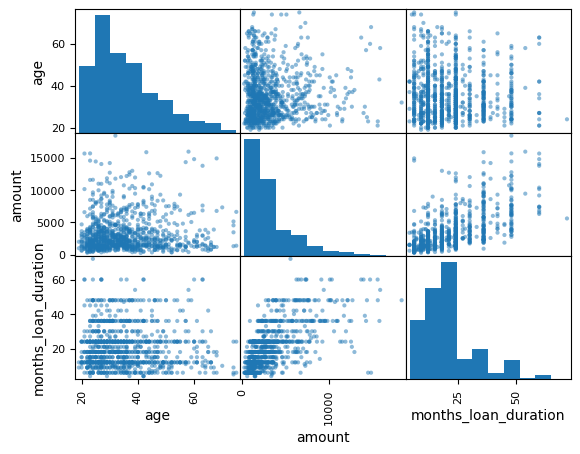

In [143]:
scatter_matrix(df)
plt.plot()

** Doesnt look like grouping correspond to differ credit_history type. Seems like it tend to gather at one place and then shatter further. Separating good and upper credit_history might be hard. age & ammount looks to be promising features.**

In [154]:
# credit_history of client based on ammount
# d[d[:,0] == "good", 9] is a row selector and selects all "good" history type rows.
d = np.array(df)
print(d[d[:,ammount] >= 12500, credit_history])

['yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no'
 'yes' 'no' 'yes' 'yes' 'yes' 'no']


**this shows that petal_length and petal_width can separate the classes (sspecies) pretty well. Expect a very good model** 

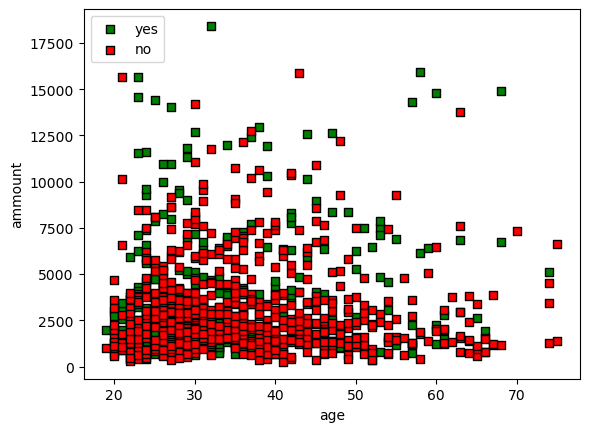

In [155]:
# yes and no for each default?
d = np.array(df)
# d = df.to_numpy()
plt.scatter(
 d[d[:,3] == "yes", 0], d[d[:,3] == "yes", 1],
 c='green', marker='s', edgecolor='black',
 label='yes'
)
plt.scatter(
 d[d[:,3] == "no", 0], d[d[:,3] == "no", 1],
 c='red', marker='s', edgecolor='black',
 label='no'
)
plt.xlabel('age')
plt.ylabel('ammount')
plt.legend(loc="upper left")
plt.show()

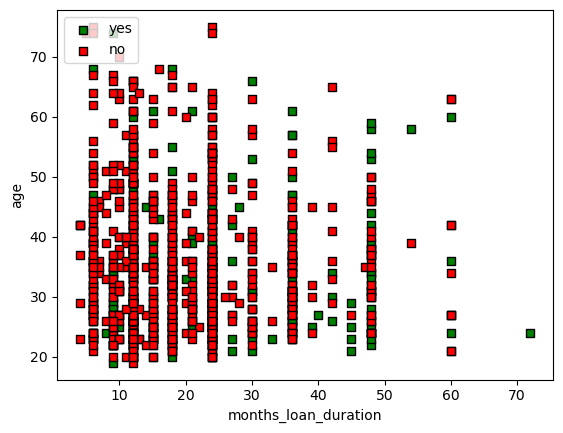

In [156]:
# months_loan_duration and age for each credit_history?
d = np.array(df)
# d = df.to_numpy()
plt.scatter(
 d[d[:,credit_history] == "yes", months_loan_duration],
 d[d[:,credit_history] == "yes", age],
 c='green', marker='s', edgecolor='black',
 label='yes'
)
plt.scatter(
 d[d[:,credit_history] == "no", months_loan_duration],
 d[d[:,credit_history] == "no", age],
 c='red', marker='s', edgecolor='black',
 label='no'
)
plt.xlabel('months_loan_duration')
plt.ylabel('age')
plt.legend(loc="upper left")
plt.show()

#### Build the Model

In [157]:
# Clean or encode categorical data
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop(columns='default_yes')  # Adjust for your column names
y = df_encoded['default_yes']

In [158]:
# 125 training and 25 test
# stratify ensures the same proportions of species in traing and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=1, stratify=y)

In [159]:
# model = DecisionTreeClassifier(max_depth=2)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print(model.get_depth())

22


#### Evaluation

In [160]:
print("[training accuracy: ", model.score(X_train, y_train), "]")
print("test accuracy: ", model.score(X_test, y_test))

[training accuracy:  1.0 ]
test accuracy:  0.6


**testing accuracy is the important one**

In [161]:
#Predict the response for test dataset
y_hat = model.predict(X_test)
print("test accuracy:", accuracy_score(y_test, y_hat))

test accuracy: 0.6


In [162]:
# confusion matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[12  5]
 [ 5  3]]


In [137]:
#### Draw the tree

In [163]:
# Select only the relevant features
feature_names = ["age", "ammount", "months_loan_duration"]
target_names = ["yes", "no"]

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_names,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('plots/credit.png')
Image(graph.create_png())